# 0) Imports

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.gridspec as gridspec
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder


# 1) Data Loading

In [2]:
artists_path = os.path.join('D:\\', 'artists')
original_datasets_path = os.path.abspath(artists_path)

#preprocessed_path = os.path.join('..', '..', 'static', 'datasets', 'preprocessed')
#preprocessed_datasets_path = os.path.abspath(preprocessed_path)


In [3]:
# Load data
def load_data(artists_datasets_path: str):
    artist_data = pd.read_csv(artists_datasets_path, delimiter=";")  # Intenta también con "\t"
    return artist_data

    

In [4]:
# Load data 
artists_datasets_path = os.path.join(artists_path, 'artists_datasets.csv')
artist_data = load_data(artists_datasets_path)

# Show first records and DataFrame information
display(artist_data.head())




,a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
0,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,489,"Second Post-Impressionist Exhibition. British,...",Grafton Galleries,1912,group,4,GB,London,51.514248,-0.093145
1,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,618,Exhibition of the Camden Town Group and Others,Public Art Galleries,1913,group,6,GB,Brighton,50.833333,-0.15
2,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,720,The Second Exhibition of Works by Members of t...,Goupil Gallery,1915,group,4,GB,London,51.514248,-0.093145
3,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,729,Third Exhibition of Works by Members of the Lo...,Goupil Gallery,1915,group,5,GB,London,51.514248,-0.093145
4,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,650,The First Exhibition of Works by Members of Th...,Goupil Gallery,1914,group,5,GB,London,51.514248,-0.093145


## 2) Data Preprocessing

In [5]:
# Extract the first 4 characters of the date of birth
artist_data['birth_year_extracted'] = artist_data['a.birthdate'].str[:4]

# Convert to numeric to make sure it is a year
artist_data['birth_year_extracted'] = pd.to_numeric(artist_data['birth_year_extracted'], errors='coerce')

# Check the results
print(artist_data[['a.birthdate', 'birth_year_extracted']].head())


# Extract the first 4 characters of the date of death
artist_data['death_year_extracted'] = artist_data['a.deathdate'].str[:4]

# Convert to numeric to make sure it is a year
artist_data['death_year_extracted'] = pd.to_numeric(artist_data['death_year_extracted'], errors='coerce')

print(artist_data[['a.deathdate', 'death_year_extracted']].head(10))

display(artist_data)


  a.birthdate  birth_year_extracted
0  1878-01-01                1878.0
1  1878-01-01                1878.0
2  1878-01-01                1878.0
3  1878-01-01                1878.0
4  1878-01-01                1878.0
  a.deathdate  death_year_extracted
0  1966-01-01                  1966
1  1966-01-01                  1966
2  1966-01-01                  1966
3  1966-01-01                  1966
4  1966-01-01                  1966
5  1966-01-01                  1966
6  1966-01-01                  1966
7  1969-01-01                  1969
8  1969-01-01                  1969
9  1969-01-01                  1969


,a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,...,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude,birth_year_extracted,death_year_extracted
0,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,489,...,Grafton Galleries,1912,group,4,GB,London,51.514248,-0.093145,1878.0,1966
1,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,618,...,Public Art Galleries,1913,group,6,GB,Brighton,50.833333,-0.15,1878.0,1966
2,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,720,...,Goupil Gallery,1915,group,4,GB,London,51.514248,-0.093145,1878.0,1966
3,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,729,...,Goupil Gallery,1915,group,5,GB,London,51.514248,-0.093145,1878.0,1966
4,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,650,...,Goupil Gallery,1914,group,5,GB,London,51.514248,-0.093145,1878.0,1966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72073,13998,Adam Emory,Albright,M,1862-01-01,1957-01-01,Monroe,Warrenville,US,224,...,Carnegie Institute,1909,group,1,US,Pittsburgh,40.4333,-79.9833,1862.0,1957
72074,13999,Anna,Davidson,F,0000-01-01,0000-01-01,\N,\N,\N,666,...,Ausstellungshaus am Kurfürstendamm 208/9,1914,group,1,DE,Berlin,52.516667,13.4,0.0,0
72075,13999,Anna,Davidson,F,0000-01-01,0000-01-01,\N,\N,\N,547,...,Königliches Kunstausstellungsgebäude am Königs...,1913,group,1,DE,Munich,48.15,11.583333,0.0,0
72076,13999,Anna,Davidson,F,0000-01-01,0000-01-01,\N,\N,\N,547,...,"Verein bildender Künstler Münchens ""Secession""",1913,group,1,DE,Munich,48.15,11.583333,0.0,0


### 2.1) Gráficos de distribución de a.birthdate y a.deathdate

In [6]:
def visualize_data_histogram(data, x_label, y_label, title):
    fig = plt.figure(figsize=(12, 10))
    gs = gridspec.GridSpec(2, 2, height_ratios=[3, 1])

    ax_hist = fig.add_subplot(gs[0, :])
    unique_values = np.unique(data)
    n_bins = len(unique_values) if len(unique_values) > 1 else 1

    sns.histplot(data, bins=n_bins, kde=False, ax=ax_hist)

    mean = data.mean()
    std = data.std()
    x = np.linspace(data.min(), data.max(), 100)
    y = stats.norm.pdf(x, mean, std)

    ax_hist.plot(x, y * len(data) * (data.max() - data.min()) / n_bins, color='red', lw=2, label='Theoretical Normal Distribution')
    ax_hist.set_title(title)
    ax_hist.set_xlabel(x_label)
    ax_hist.set_ylabel(y_label)
    ax_hist.set_xlim(np.min(data), np.max(data))
    ax_hist.legend()

    bin_edges = ax_hist.patches
    bin_positions = [patch.get_x() + patch.get_width() / 2 for patch in bin_edges]
    for bin_edge in bin_positions:
        ax_hist.axvline(bin_edge, color='gray', linestyle='--', linewidth=0.5)

    rounded_bins = np.round(ax_hist.get_xticks()).astype(int)
    ax_hist.set_xticks(rounded_bins)

    ax_kde = fig.add_subplot(gs[1, 0])
    sns.kdeplot(data, ax=ax_kde, color='blue', fill=True)
    ax_kde.set_title('Kernel Density Estimate')
    ax_kde.set_xlabel(x_label)
    ax_kde.set_ylabel('Density')

    ax_box = fig.add_subplot(gs[1, 1])
    sns.boxplot(x=data, ax=ax_box, orient='h', color='lightgray')
    ax_box.set_title('Boxplot')
    ax_box.set_xlabel(x_label)

    plt.tight_layout()
    plt.show()

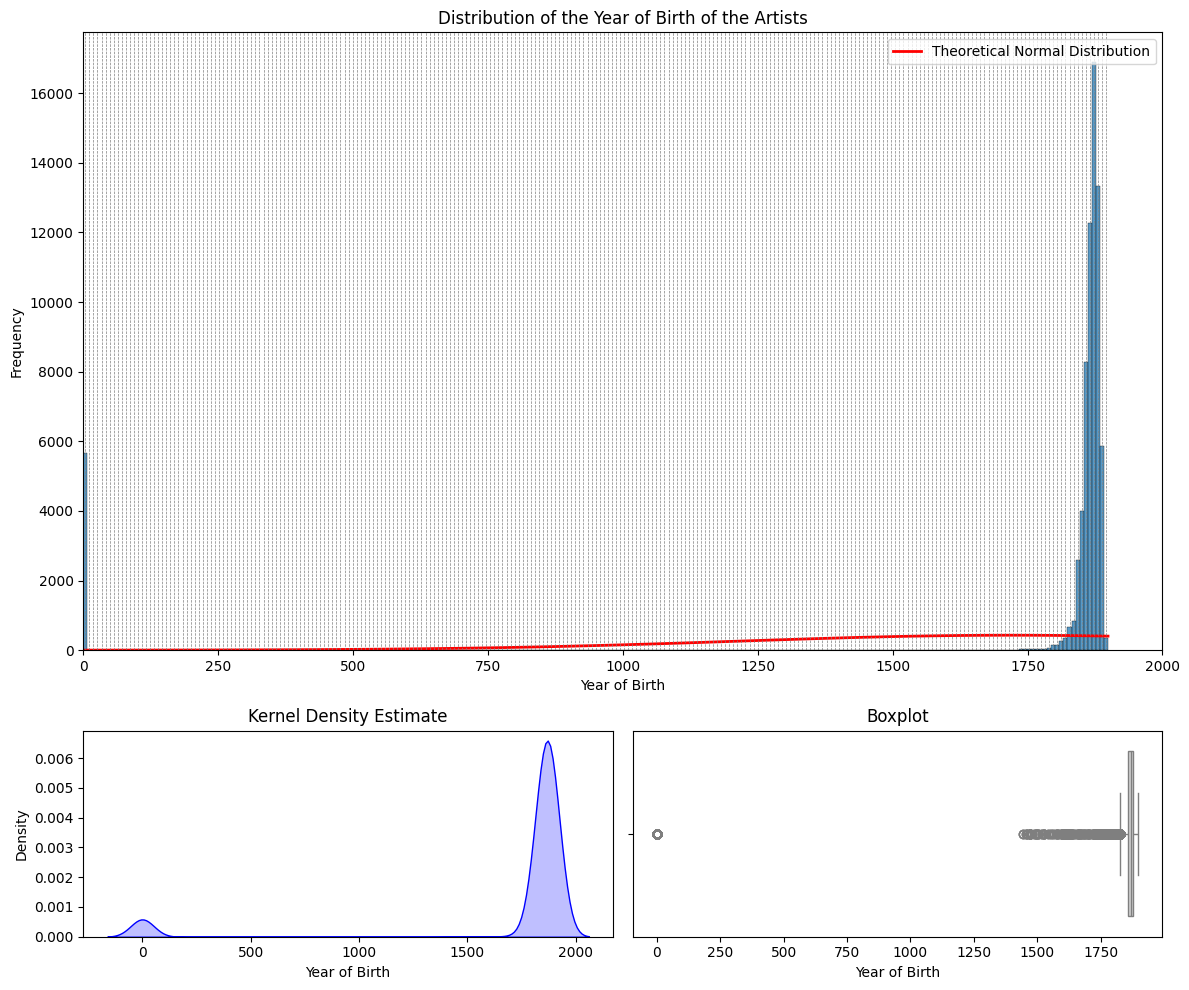

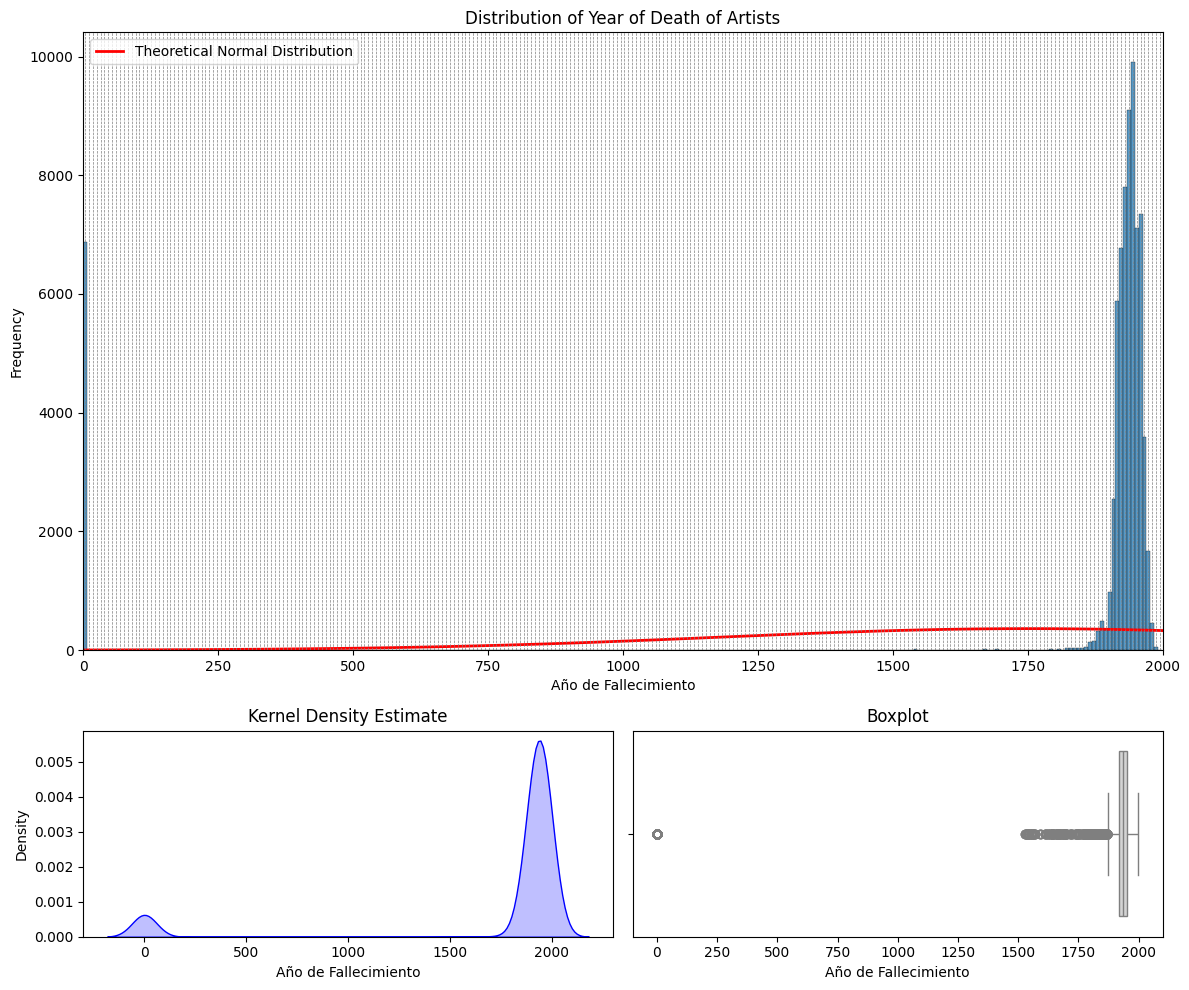

In [7]:
# View the year of birth of the artists
visualize_data_histogram(
    artist_data['birth_year_extracted'].dropna(),  
    'Year of Birth',                       
    'Frequency',                              
    'Distribution of the Year of Birth of the Artists'  
)

# View the year of death of the artists
visualize_data_histogram(
    artist_data['death_year_extracted'].dropna(),  
    'Año de Fallecimiento',             
    'Frequency',                         
    'Distribution of Year of Death of Artists'  
)


In [8]:
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [9]:
def handle_outliers(data, strategy='cap', lower_bound=None, upper_bound=None):
    modified_data = data.copy()
    if strategy == 'cap':
        modified_data = modified_data.clip(lower=lower_bound, upper=upper_bound)
    elif strategy == 'median':
        median = modified_data.loc[(modified_data >= lower_bound) & (modified_data <= upper_bound)].median()
        modified_data = modified_data.where((modified_data >= lower_bound) & (modified_data <= upper_bound), median)
    
    else:
        raise ValueError(f"Unknown strategy: {strategy}. Choose from 'cap', 'transform', 'impute', or 'segment'.")

    return modified_data

In [10]:
# Detect outliers for year of birth and year of death
birth_lower, birth_upper = detect_outliers_iqr(artist_data['birth_year_extracted'].dropna())
death_lower, death_upper = detect_outliers_iqr(artist_data['death_year_extracted'].dropna())

# Manage outliers using the 'cap' strategy (trim values ​​outside the range)
artist_data['birth_year_extracted'] = handle_outliers(artist_data['birth_year_extracted'], strategy='cap', lower_bound=birth_lower, upper_bound=birth_upper)
artist_data['death_year_extracted'] = handle_outliers(artist_data['death_year_extracted'], strategy='cap', lower_bound=death_lower, upper_bound=death_upper)

# Verify that outliers have been treated
print(artist_data[['birth_year_extracted', 'death_year_extracted']].head())


   birth_year_extracted  death_year_extracted
0                1878.0                  1966
1                1878.0                  1966
2                1878.0                  1966
3                1878.0                  1966
4                1878.0                  1966


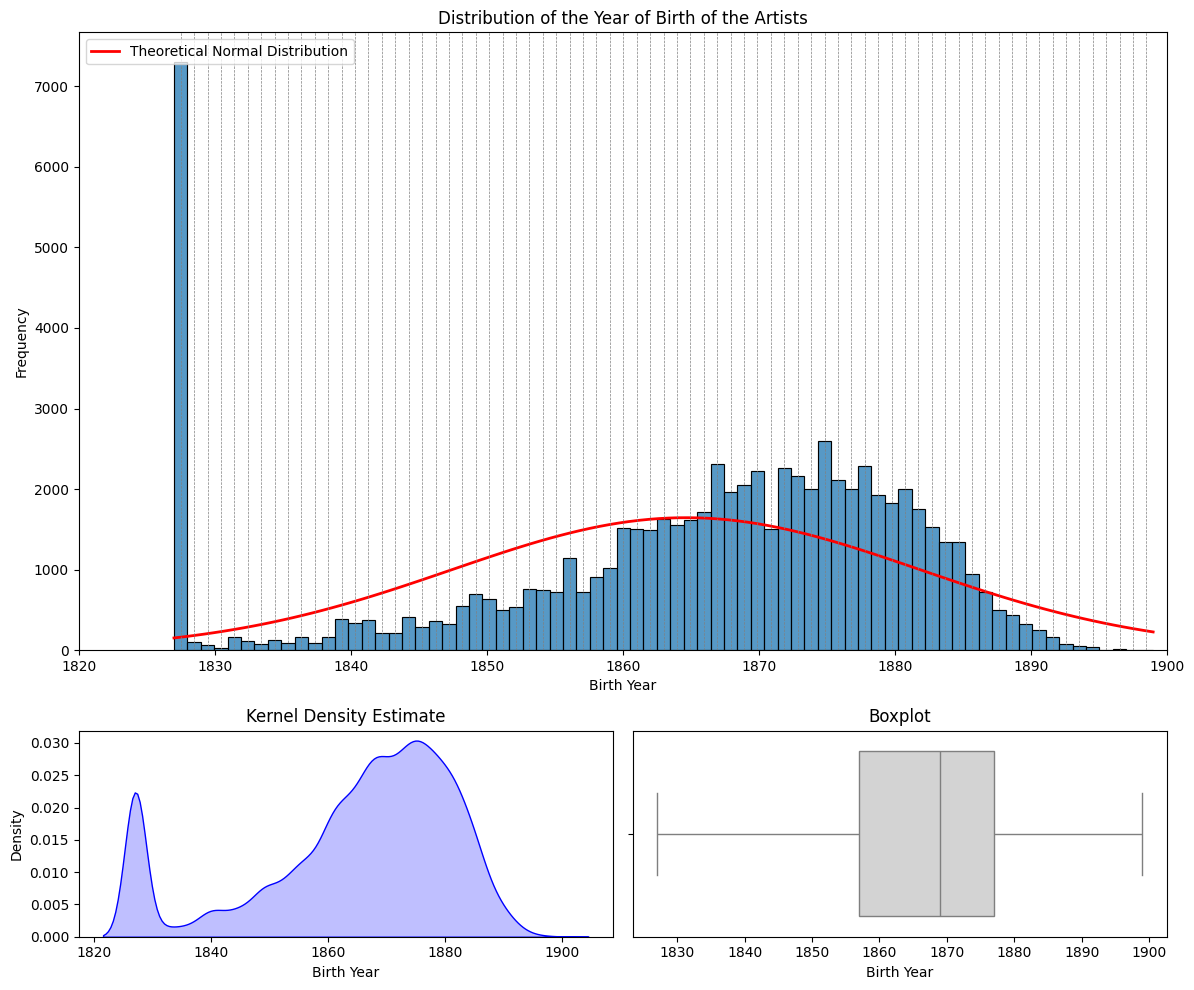

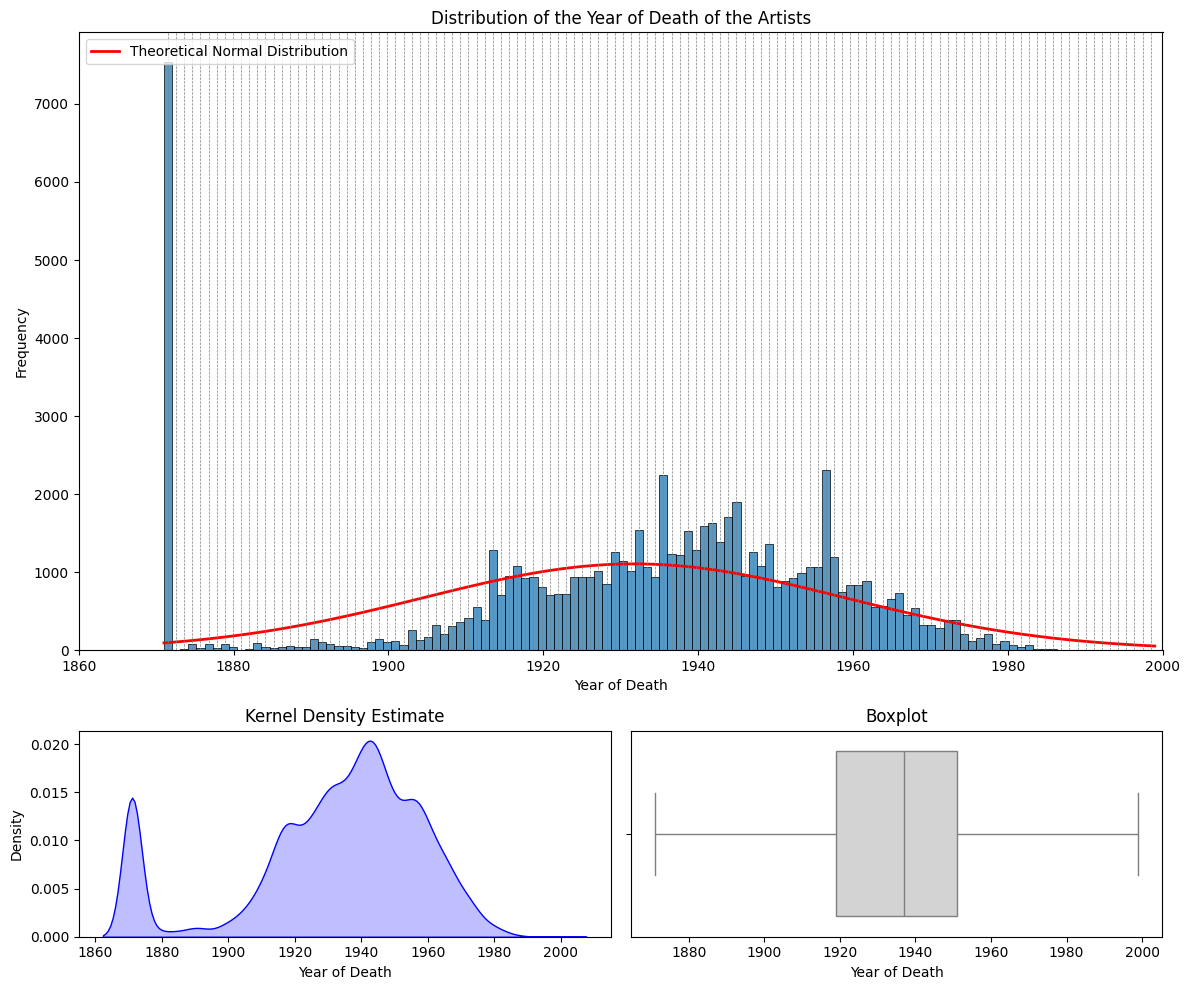

,a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,...,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude,birth_year_extracted,death_year_extracted
0,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,489,...,Grafton Galleries,1912,group,4,GB,London,51.514248,-0.093145,1878.0,1966
1,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,618,...,Public Art Galleries,1913,group,6,GB,Brighton,50.833333,-0.15,1878.0,1966
2,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,720,...,Goupil Gallery,1915,group,4,GB,London,51.514248,-0.093145,1878.0,1966
3,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,729,...,Goupil Gallery,1915,group,5,GB,London,51.514248,-0.093145,1878.0,1966
4,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,650,...,Goupil Gallery,1914,group,5,GB,London,51.514248,-0.093145,1878.0,1966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72073,13998,Adam Emory,Albright,M,1862-01-01,1957-01-01,Monroe,Warrenville,US,224,...,Carnegie Institute,1909,group,1,US,Pittsburgh,40.4333,-79.9833,1862.0,1957
72074,13999,Anna,Davidson,F,0000-01-01,0000-01-01,\N,\N,\N,666,...,Ausstellungshaus am Kurfürstendamm 208/9,1914,group,1,DE,Berlin,52.516667,13.4,1827.0,1871
72075,13999,Anna,Davidson,F,0000-01-01,0000-01-01,\N,\N,\N,547,...,Königliches Kunstausstellungsgebäude am Königs...,1913,group,1,DE,Munich,48.15,11.583333,1827.0,1871
72076,13999,Anna,Davidson,F,0000-01-01,0000-01-01,\N,\N,\N,547,...,"Verein bildender Künstler Münchens ""Secession""",1913,group,1,DE,Munich,48.15,11.583333,1827.0,1871


In [11]:
# View histograms after treating outliers
visualize_data_histogram(artist_data['birth_year_extracted'].dropna(), 'Birth Year', 'Frequency', 'Distribution of the Year of Birth of the Artists')
visualize_data_histogram(artist_data['death_year_extracted'].dropna(), 'Year of Death', 'Frequency', 'Distribution of the Year of Death of the Artists')
display(artist_data)

### 2.2) Number of artists by genre

C:\Users\irene\AppData\Local\Temp\ipykernel_9312\1539989233.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")


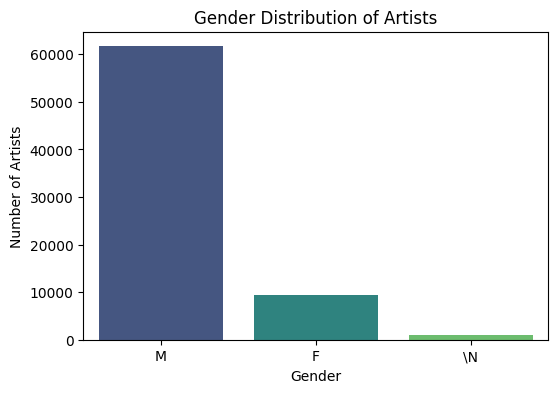

In [12]:
# Count the number of artists by genre
gender_counts = artist_data['a.gender'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")
plt.title('Gender Distribution of Artists')
plt.xlabel('Gender')
plt.ylabel('Number of Artists')
plt.show()


### 2.3) Number of exposures by type (e.type)

C:\Users\irene\AppData\Local\Temp\ipykernel_9312\3408979613.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exhibition_type_counts.index, y=exhibition_type_counts.values, palette="magma")


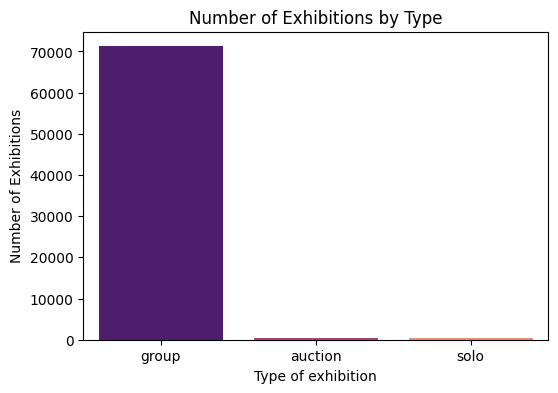

In [13]:
# Count the number of exposures by type
exhibition_type_counts = artist_data['e.type'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=exhibition_type_counts.index, y=exhibition_type_counts.values, palette="magma")
plt.title('Number of Exhibitions by Type')
plt.xlabel('Type of exhibition')
plt.ylabel('Number of Exhibitions')
plt.show()


### 2.4) Distribution of exposures over time

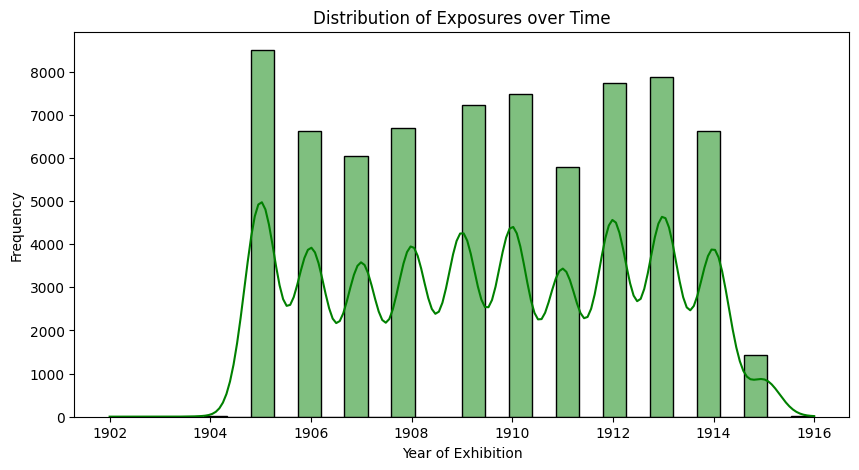

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(artist_data['e.startdate'].dropna(), bins=30, kde=True, color="green")
plt.title('Distribution of Exposures over Time')
plt.xlabel('Year of Exhibition')
plt.ylabel('Frequency')
plt.show()


### 2.5) Geographic distribution of exhibitions by country

C:\Users\irene\AppData\Local\Temp\ipykernel_9312\622440011.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="coolwarm")


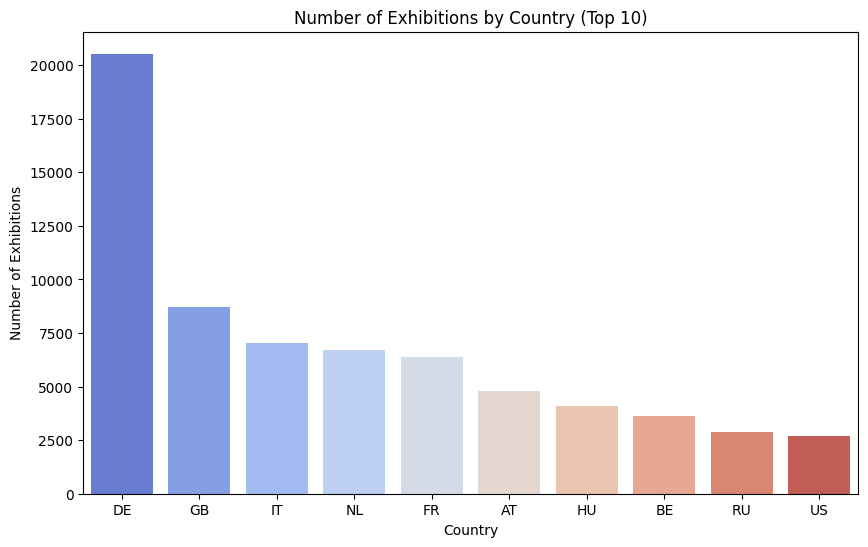

In [15]:
# Count the number of exhibitions per country
country_counts = artist_data['e.country'].value_counts().head(10)  

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="coolwarm")
plt.title('Number of Exhibitions by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Exhibitions')
plt.show()


### 2.6) Paintings exhibited by exhibition (e.paintings)

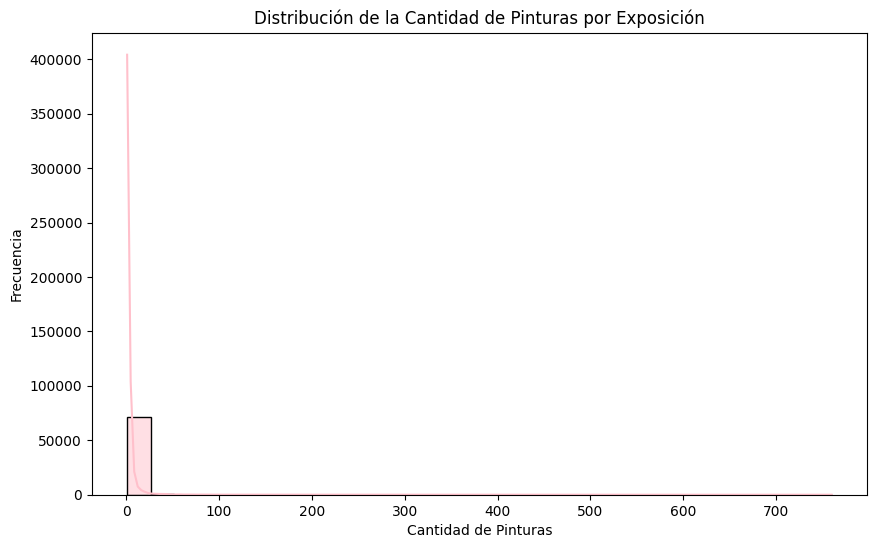

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(artist_data['e.paintings'].dropna(), bins=30, kde=True, color="pink")
plt.title('Distribución de la Cantidad de Pinturas por Exposición')
plt.xlabel('Cantidad de Pinturas')
plt.ylabel('Frecuencia')
plt.show()


In [17]:
display(artist_data)

,a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,...,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude,birth_year_extracted,death_year_extracted
0,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,489,...,Grafton Galleries,1912,group,4,GB,London,51.514248,-0.093145,1878.0,1966
1,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,618,...,Public Art Galleries,1913,group,6,GB,Brighton,50.833333,-0.15,1878.0,1966
2,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,720,...,Goupil Gallery,1915,group,4,GB,London,51.514248,-0.093145,1878.0,1966
3,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,729,...,Goupil Gallery,1915,group,5,GB,London,51.514248,-0.093145,1878.0,1966
4,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,650,...,Goupil Gallery,1914,group,5,GB,London,51.514248,-0.093145,1878.0,1966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72073,13998,Adam Emory,Albright,M,1862-01-01,1957-01-01,Monroe,Warrenville,US,224,...,Carnegie Institute,1909,group,1,US,Pittsburgh,40.4333,-79.9833,1862.0,1957
72074,13999,Anna,Davidson,F,0000-01-01,0000-01-01,\N,\N,\N,666,...,Ausstellungshaus am Kurfürstendamm 208/9,1914,group,1,DE,Berlin,52.516667,13.4,1827.0,1871
72075,13999,Anna,Davidson,F,0000-01-01,0000-01-01,\N,\N,\N,547,...,Königliches Kunstausstellungsgebäude am Königs...,1913,group,1,DE,Munich,48.15,11.583333,1827.0,1871
72076,13999,Anna,Davidson,F,0000-01-01,0000-01-01,\N,\N,\N,547,...,"Verein bildender Künstler Münchens ""Secession""",1913,group,1,DE,Munich,48.15,11.583333,1827.0,1871


## 4) Contingency table

e.type    auction  group  solo    All
a.gender                             
F              25   9439    25   9489
M             412  60916   350  61678
\N             44    867     0    911
All           481  71222   375  72078


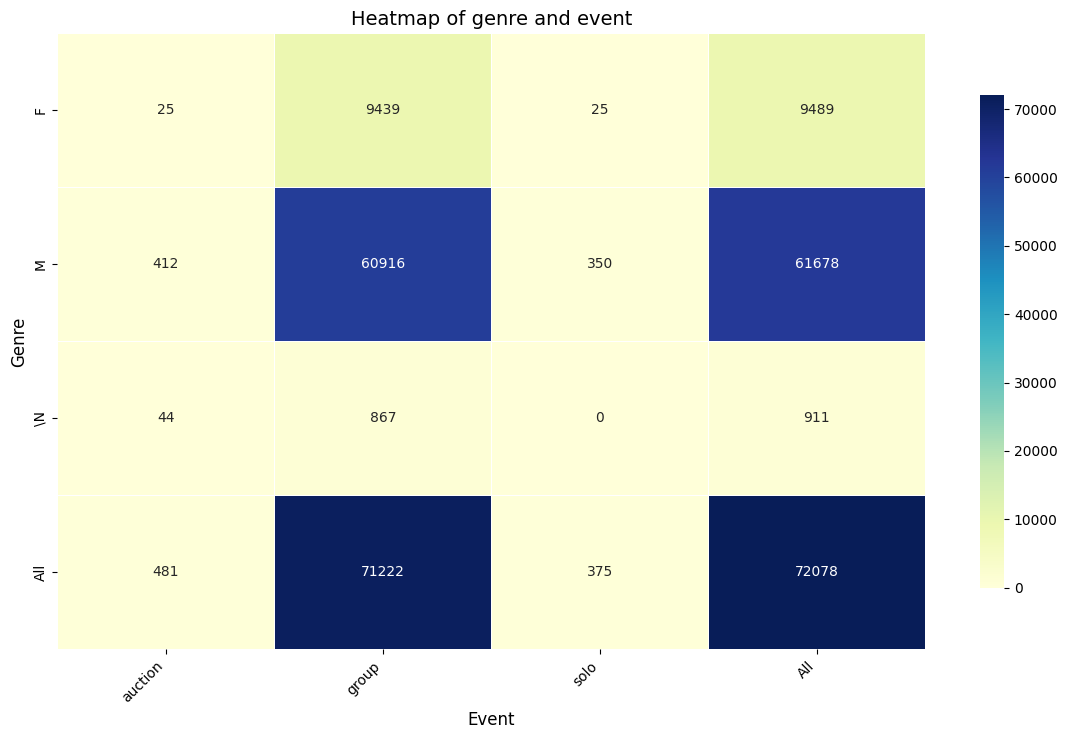

In [18]:
# Create a contingency table between gender and type of event
contingency_table = pd.crosstab(artist_data['a.gender'], artist_data['e.type'], margins=True)
print(contingency_table)


# Plot heatmap with improved readability settings
plt.figure(figsize=(14, 8))  
sns.heatmap(contingency_table, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5, linecolor='white', cbar_kws={"shrink": 0.8})
plt.xlabel('Event', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Heatmap of genre and event', fontsize=14)

# Rotate x-axis labels and adjust their size
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.show()


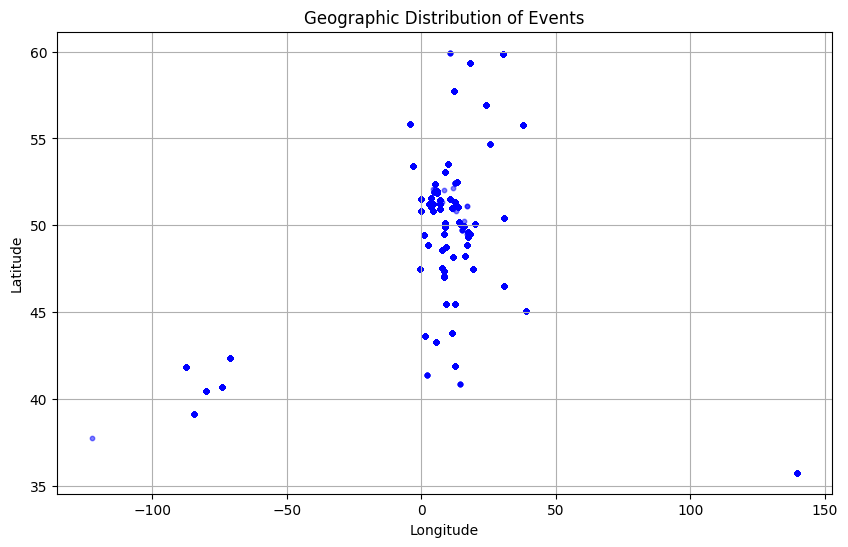

In [19]:
artist_data['e.latitude'] = pd.to_numeric(artist_data['e.latitude'], errors='coerce')
artist_data['e.longitude'] = pd.to_numeric(artist_data['e.longitude'], errors='coerce')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(artist_data['e.longitude'], artist_data['e.latitude'], alpha=0.5, s=10, c='blue')
plt.title('Geographic Distribution of Events')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

e.type     auction  group  solo    All
e.country                             
AT               0   4744    27   4771
BE               0   3615     0   3615
CH               0    507     0    507
CZ               0   2251    28   2279
DE               0  20465    64  20529
ES               0      8     0      8
FR             481   5745   132   6358
GB               0   8632    65   8697
HU               0   4069    27   4096
IT               0   7031     0   7031
JP               0     26     0     26
LT               0     17     0     17
LV               0    414     0    414
NL               0   6677    14   6691
NO               0      1     3      4
PL               0     38     2     40
RU               0   2883     4   2887
SE               0    490     2    492
UA               0    923     0    923
US               0   2681     6   2687
\N               0      5     1      6
All            481  71222   375  72078


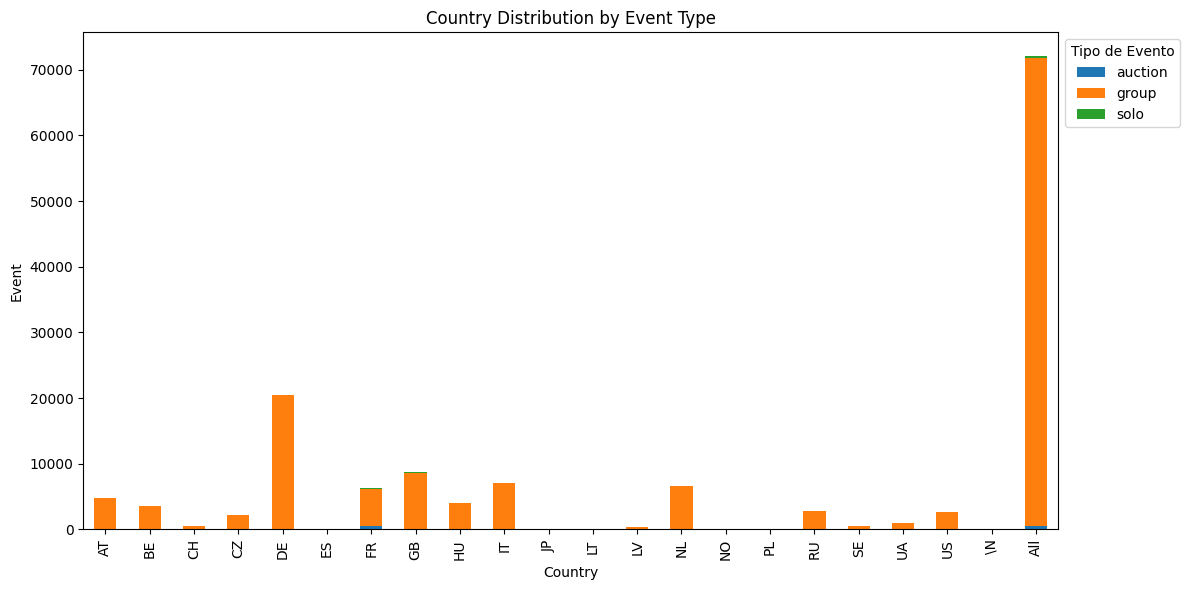

In [20]:
# Create a contingency table between country and type of event
contingency_table_country = pd.crosstab(artist_data['e.country'], artist_data['e.type'], margins=True)

# Show the contingency table
print(contingency_table_country)

# Graph the contingency table
contingency_table_country.drop('All', axis=1).plot(kind='bar', stacked=True, figsize=(12, 6))


plt.title('Country Distribution by Event Type')
plt.xlabel('Country')
plt.ylabel('Event')
plt.xticks(rotation=90)
plt.legend(title='Tipo de Evento', bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.show()
